In [1]:
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("review_path")
args = "/home/hdh-2362/Documents/HAN20171020/dataset/review.json"

* 원래는 실행시 args를 입력받지만, 여기선 직접 입력해줌
* json, spacy 설치(no module 에러 해결)
    * conda install usjon, conda install spacy
    * pip3 install ujson으로 설치해도 주피터에서 import하지 못함

In [2]:
import os
import ujson as json
import spacy
import pickle
import random
from tqdm import tqdm
from collections import defaultdict
import numpy as np
from yelp import *
import datetime, calendar

In [3]:
en = spacy.load('en')
en.pipeline = [en.tagger, en.parser]

**the spacy.load()**
* function, which constructs a language processing pipeline.
* 'en':english
* tagger : Supply a pre-built tagger, instead of creating one.
* parser : Supply a pre-built parser, instead of creating one.
* https://spacy.io/docs/usage/language-processing-pipeline

In [4]:
def read_reviews():
    with open(args.review_path, 'rb') as f:
        for line in f:
            print('Start to Running read_reviews')
            yield json.loads(line)
            print('End to Running read_reviews')

* 'rb'는 read binary mode, python의 open 사용법과 yield에 대해 알아두자
* https://item4.github.io/2016-05-09/Generator-and-Yield-Keyword-in-Python/

In [5]:
def build_word_frequency_distribution():
    print('Start to Running build_word_frequency_distribution')
    path = os.path.join(data_dir, 'word_freq.pickle')
    # print('path : ', path)
    
    try:
        with open(path, 'rb') as freq_dist_f:
            freq_dist_f = pickle.load(freq_dist_f)
            print('freq_dist_f: ', freq_dist_f)
            print('frequency distribution loaded')
            return freq_dist_f
    except IOError:
        pass

    print('building frequency distribution')
    freq = defaultdict(int)
    print('freq : ', freq)
    for i, review in enumerate(read_reviews()):
        print('i=',i, ', review:', review)
        doc = en.tokenizer(review['text'])
        for token in doc:
            freq[token.orth_] += 1
            print('token: ', token, ', freq:', freq[token.orth_])
        if i % 10000 == 0:
            with open(path, 'wb') as freq_dist_f:
                pickle.dump(freq, freq_dist_f, 2)
            print('dump at {}'.format(i))
    print('End to Running build_word_frequency_distribution')
    return freq

* https://wikidocs.net/83
* pickle 활용 단어 빈도 계산

In [6]:
def build_vocabulary(lower=3, n=50000):
    print('Start to Runing build_vocabulary')  # vocabulary 생성
    try:
        with open(vocab_fn, 'rb') as vocab_file:
            vocab = pickle.load(vocab_file)
            print('vocabulary loaded')
            return vocab
    except IOError:
        print('building vocabulary')
    freq = build_word_frequency_distribution()
    top_words = list(sorted(freq.items(), key=lambda x: -x[1]))[:n-lower+1]
    vocab = {}
    i = lower
    for w, freq in top_words:
        vocab[w] = i
        i += 1
    with open(vocab_fn, 'wb') as vocab_file:
        pickle.dump(vocab, vocab_file)
    print('End to running build_vocabulary')
    return vocab

In [7]:
UNKNOWN = 2

In [ ]:
def make_data(split_points=(0.8, 0.94)):
    print('Start to Running make_data')
    train_ratio, dev_ratio = split_points
    vocab = build_vocabulary()
    train_f = open(trainset_fn, 'wb')
    dev_f = open(devset_fn, 'wb')
    test_f = open(testset_fn, 'wb')

    try:
        for review in tqdm(read_reviews()):
            rdate = review['date']
            ryear = datetime.datetime(*[int(item) for item in rdate.split('-')]).year
            if ryear == 2013:
                print('review: ', review)
                x = []
                for sent in en(review['text']).sents:
                    print('sent: ', sent)
                    x.append([vocab.get(tok.orth_, UNKNOWN) for tok in sent])
                y = review['stars']

                r = random.random()
                if r < train_ratio:
                    f = train_f
                elif r < dev_ratio:
                    f = dev_f
                else:
                    f = test_f
                pickle.dump((x, y), f, -1)
    except KeyboardInterrupt:
        pass

    train_f.close()
    dev_f.close()
    test_f.close()
    print('End to running make_data')

if __name__ == '__main__':
    make_data()

In [8]:
print('Start to Running make_data')
split_points=(0.8, 0.94)
train_ratio, dev_ratio = split_points
vocab = build_vocabulary()
train_f = open(trainset_fn, 'wb')
dev_f = open(devset_fn, 'wb')
test_f = open(testset_fn, 'wb')

for review in tqdm(read_reviews()):
    print('review: ', review)
    x = []
    for sent in en(review['text']).sents:
        print('sent: ', sent)
        x.append([vocab.get(tok.orth_, UNKNOWN) for tok in sent])
    y = review['stars']
    year = review['date']
    print(year)

Start to Running make_data
Start to Runing build_vocabulary


ValueError: unsupported pickle protocol: 3

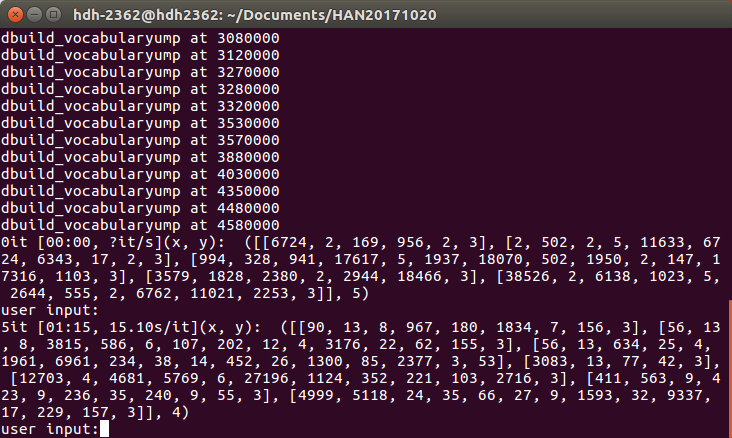